### Import Libraries

In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
df = pd.read_csv("loan_data.csv")
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [4]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

## GRAPHICAL VISUALIZATION
### Target Variable

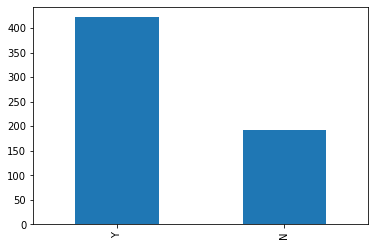

In [5]:
df['Loan_Status'].value_counts().plot.bar()

<b>Note:</b> The loan of 422 (around 69%) people out of 614 was approved.
### Independent Variable
There are 5 features that are categorical or binary (Gender, Married, Self_Employed, Credit_History, Education)

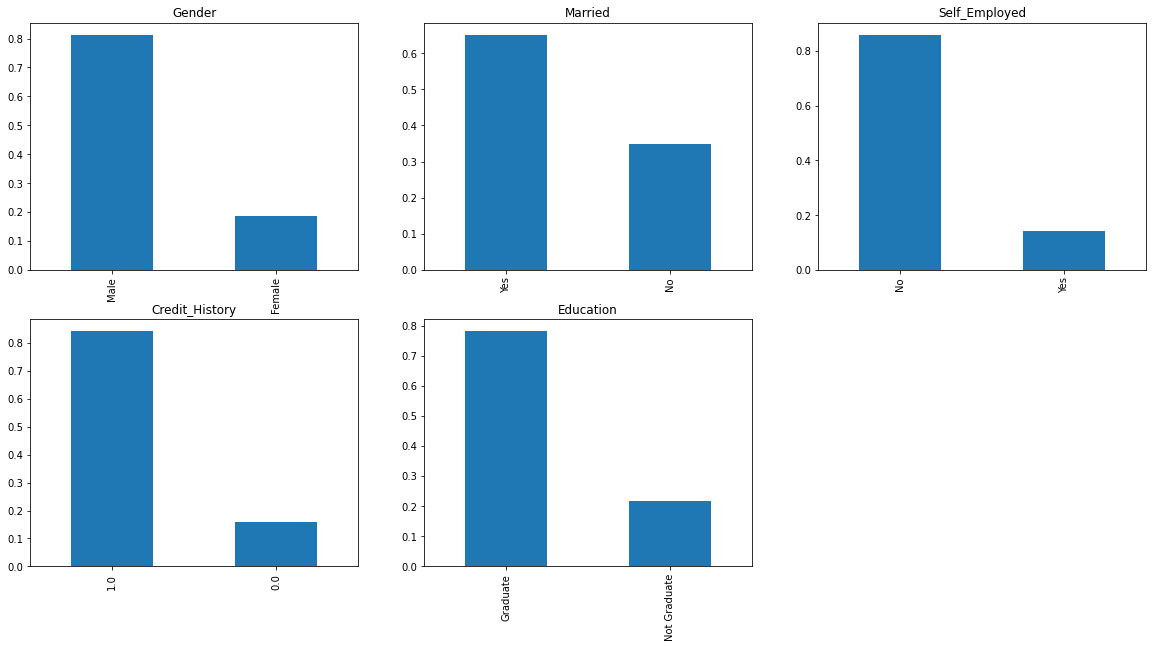

In [6]:
# Visualizing Independent Variable

plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()


It can be inferred from the above bar plots that:
- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have credit history (repaid their debts).
- Around 80% of the applicants are Graduate.

### Independent Variable (Ordinal)

There are 2 features that are Ordinal: Variables in categorical features having some order involved (Dependents, Property_Area)

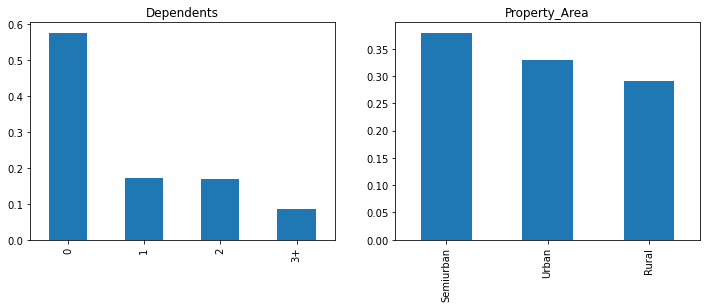

In [7]:
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

### Independent Variable (Numerical)

There are 4 features that are Numerical: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Firstly, let’s look at the Applicant income distribution:

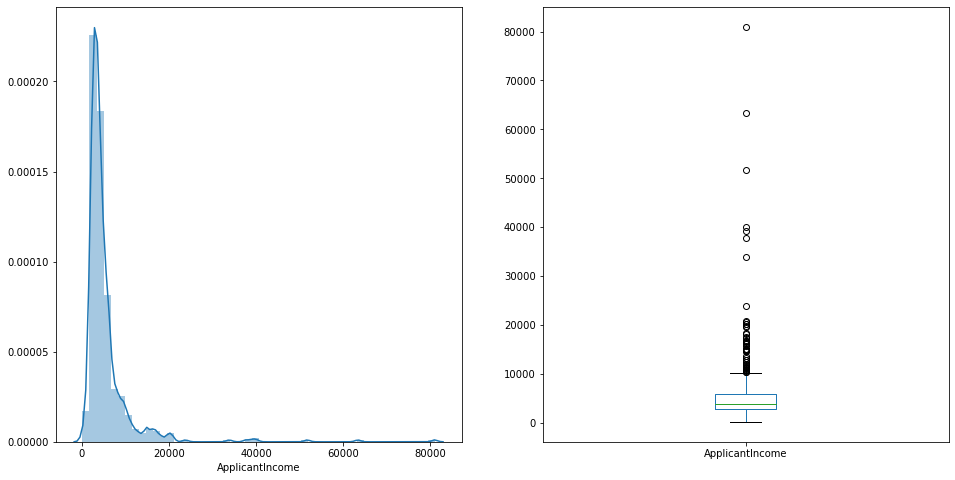

In [8]:
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,8))

plt.show()

- It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.<br>
- The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5, 0.98, '')

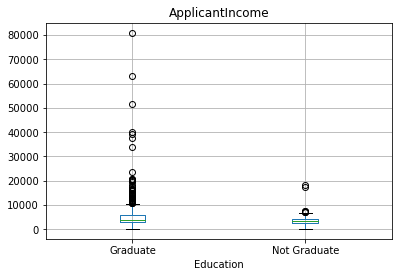

In [9]:
df.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.<br>
Now, let's look at the Coapplicant income distribution.

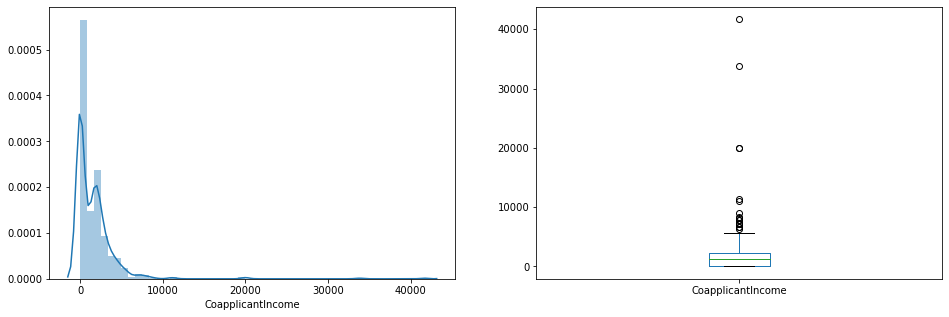

In [10]:
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Now, let’s look at the distribution of LoanAmount variable.

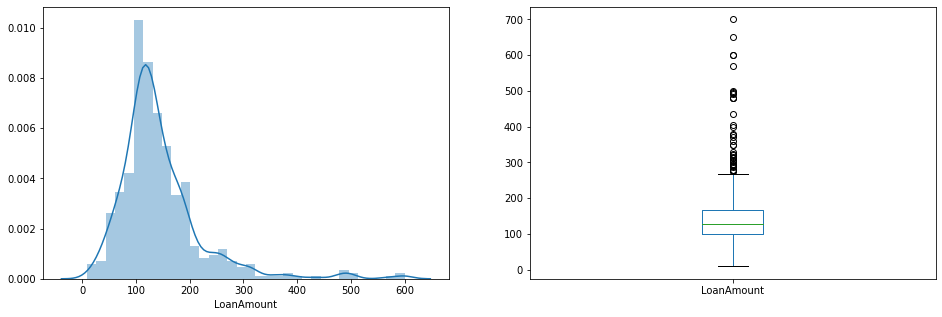

In [11]:
plt.subplot(121)
df1=df.dropna()
sns.distplot(df1['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a fairly normal distribution (albeit still slightly right-skewed) for LoanAmount but there are lot of outliers in this variable. We will treat the outliers in later sections.

Lastly, let’s look at the distribution of Loan_Amount_Term variable. Since Loan_Amount_Term is a discrete variable, we will use frequency table and bar plots which will calculate the number of each category.

In [12]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

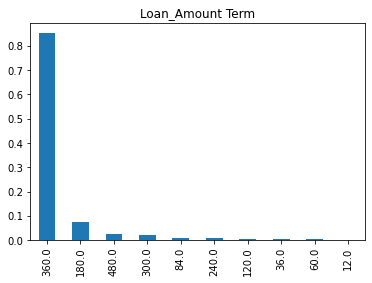

In [13]:
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title='Loan_Amount Term')

Around 85% of the loans are 360 months term or 30 years period

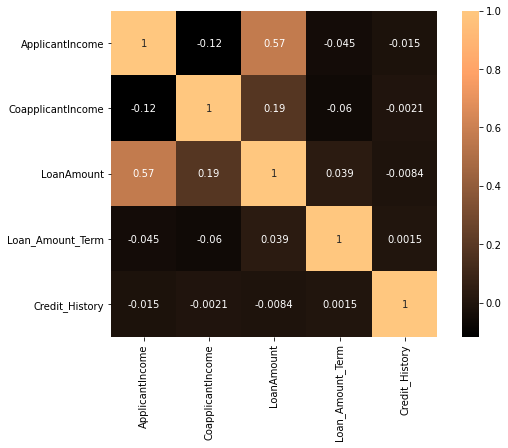

In [14]:
mat = df.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(mat, vmax=1, square=True,cmap="copper", annot=True)


<b>Note</b>: We see that the most correlated variables are
- (ApplicantIncome - LoanAmount) with correlation coefficient of 0.57
- (Credit_History - Loan_Status) with correlation coefficient of 0.56
- LoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19.

# Data Pre-processing

Data pre-processing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data pre-processing is a method of resolving such issues.<hr>

## Missing value and outlier treatment
After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.<hr>
### Missing value imputation
Let's list out feature-wise count of missing values.

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. We will treat the missing values in all the features one by one by imputing them.

In [16]:
# replace missing values with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
# replace missing values with the median value due to outliers
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

#### Check whether all the missing values are filled in the Train dataset

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the Train dataset. Let’s fill all the missing values in the test dataset too with the same approach.

### Identify Outliers
As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Having outliers in the dataset often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness (or positive skewness). One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

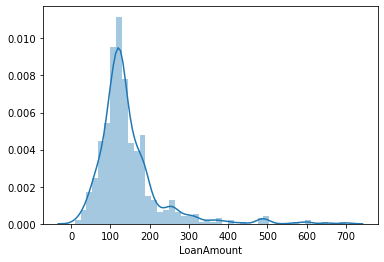

In [18]:
sns.distplot(df['LoanAmount'])

We can see some outliers above, to remove them we will take log values of LoanAmount

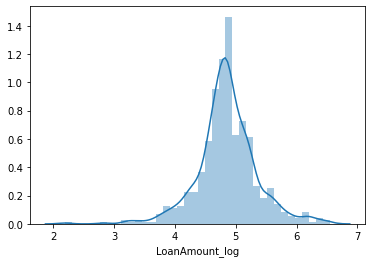

In [19]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount_log'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.<hr>
## Model Building
Let us make model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.
- Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.

In [27]:
col = ['Loan_ID','Loan_Status']
df1 = df.drop(col, axis=1)
target = df.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare.<br>
We can use pandas get_dummies function to convert categorical variable into dummy/indicator variables, it will only convert "object" type and will not affect numerical type.

In [31]:
df1 = pd.get_dummies(df1)

Let's divide our data for training and testing

In [34]:
# We will use the train_test_split function from sklearn to divide our train dataset.
train_x,test_x,train_y,test_y = train_test_split(df1, target, test_size=0.2, random_state=0)

In [33]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((491, 21), (491,), (123, 21), (123,))

The data has been divided for training and testing.
<hr>
Let's make model and predict 

In [36]:
model = LogisticRegression()
#Now we will train the model on training dataset and make predictions for the test dataset.
model.fit(train_x,train_y)
#make prediction
pred = model.predict(test_x)
# Calculate accuracy score
round(accuracy_score(pred,test_y)*100,2)

83.74

So our predictions are over 83% accurate, i.e. we have identified 83% of the loan status correctly.

Let’s evaluate our model with the confusion matrix.

Text(33.0, 0.5, 'True')

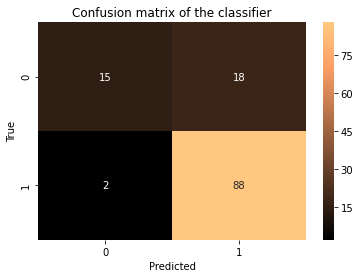

In [39]:
cm = confusion_matrix(test_y, pred)

sns.heatmap(cm, cmap = "copper" ,annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

Let's build a text report showing the main classification metrics.

In [42]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           N       0.88      0.45      0.60        33
           Y       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



The performance of our model seems encouraging, with accuracy of 84%, precision of 83% and recall of 98%.